# Robin Roy
## GRIPJAN2021
#### robinroy@gmail.com


### Importing required libraries 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

### Loading dataset

In [3]:
df1 = pd.read_csv('iris.csv')
df2= pd.DataFrame(df1)
df1.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print('Shape of the data frame is', df1.shape)

Shape of the data frame is (150, 6)


In [5]:
df1.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df1.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


### Feature selection and matrix creation

In [7]:
#Feature Selection
selected_features=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
print('Selected features are', selected_features)

Selected features are ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']


In [27]:
#Matrix Creation
x = df1.loc[:,selected_features].values
y = df1.Species
#test_size set to default 0.25 and train_size is cimplement to the test_size by default
X_train,X_test, y_train,y_test = train_test_split(x,y, random_state=0)

### Decision Tress Classifier

In [28]:
#Defining the algorithm
from sklearn.tree import DecisionTreeClassifier

In [29]:
dis_tree_classi = DecisionTreeClassifier()

In [30]:
#fitting the data to the algorithm
dis_tree_classi.fit(X_train, y_train)

DecisionTreeClassifier()

In [35]:
#checking a prediction
dis_tree_classi.predict(X_test[0:1])

array(['Iris-virginica'], dtype=object)

### Accuracy and metrics of the created model

In [34]:
score = dis_tree_classi.score(X_test,y_test)
print('The accuracy of the created model is =', score)


The accuracy of the created model is = 0.9736842105263158


In [64]:
#Mentrics
from sklearn import metrics
print(metrics.classification_report(y_test,dis_tree_classi.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



### Visualizing the Descion Tree Created

In [46]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(651.0, 815.4, 'PetalWidthCm <= 0.8\ngini = 0.665\nsamples = 112\nvalue = [37, 34, 41]\nclass = virginica'),
 Text(488.25, 634.2, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]\nclass = sentosa'),
 Text(813.75, 634.2, 'PetalLengthCm <= 4.95\ngini = 0.496\nsamples = 75\nvalue = [0, 34, 41]\nclass = virginica'),
 Text(325.5, 453.0, 'PetalWidthCm <= 1.65\ngini = 0.153\nsamples = 36\nvalue = [0, 33, 3]\nclass = versicolor'),
 Text(162.75, 271.80000000000007, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(488.25, 271.80000000000007, 'SepalWidthCm <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = virginica'),
 Text(325.5, 90.60000000000002, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(651.0, 90.60000000000002, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(1302.0, 453.0, 'PetalWidthCm <= 1.75\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]\nclass = virginica'),
 Text(1139.25, 271.80000000000007, '

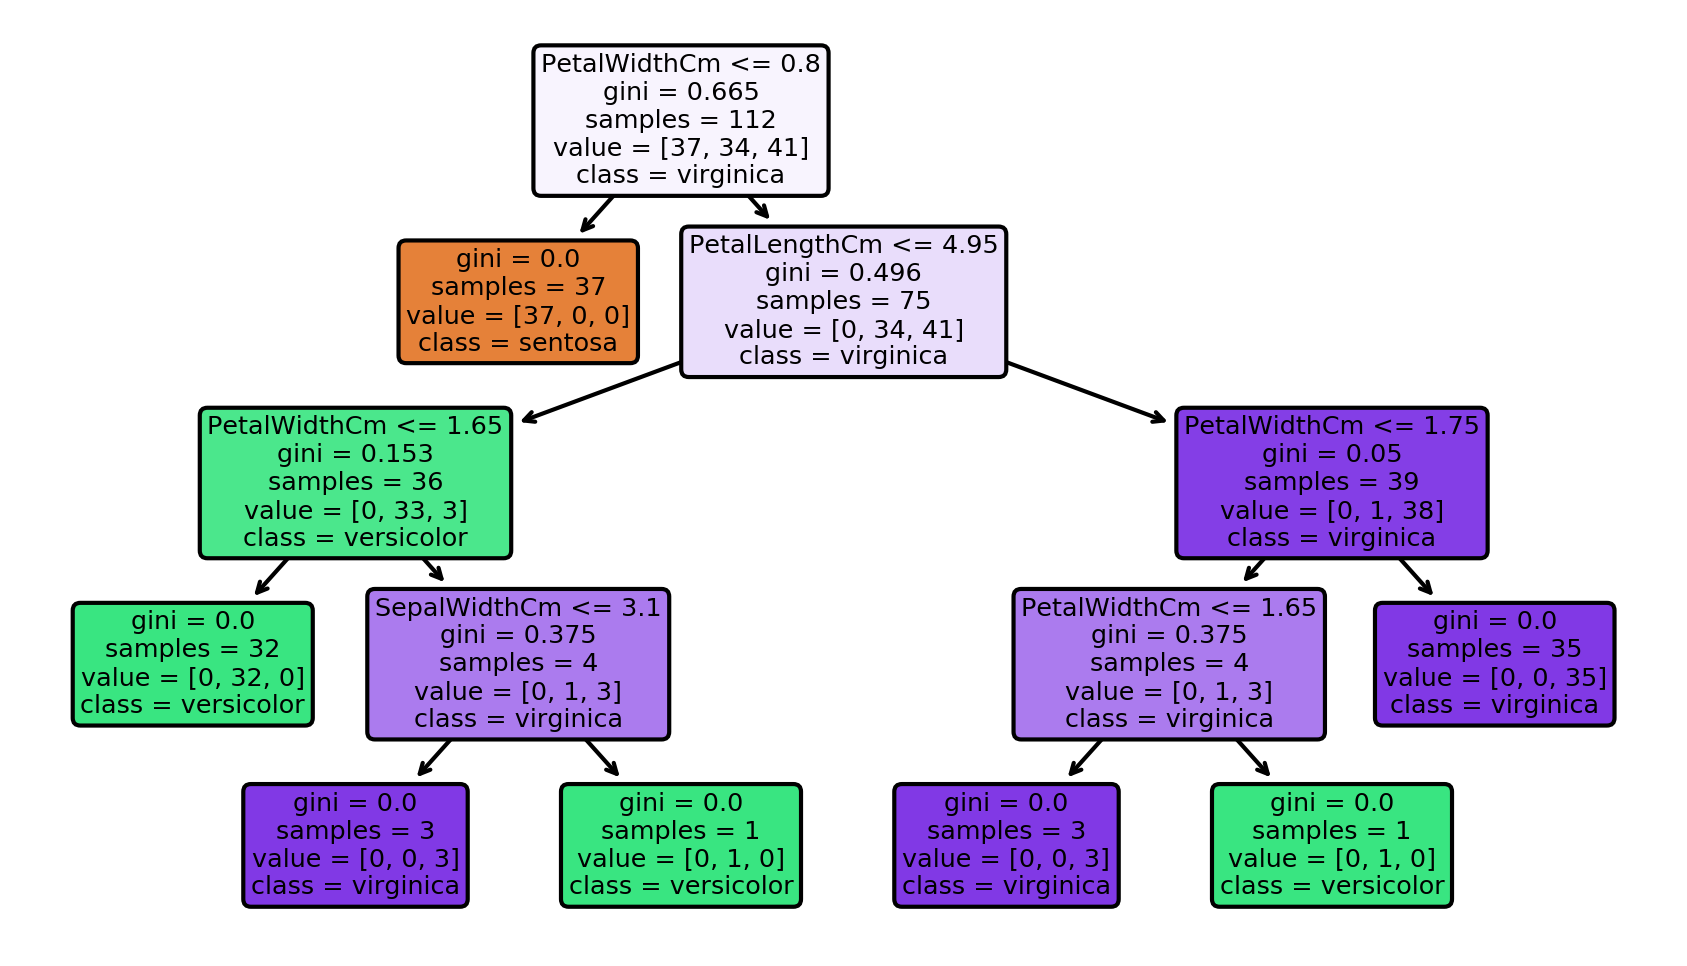

In [51]:
cn=['sentosa', 'versicolor', 'virginica']
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(7,4),dpi=300)
tree.plot_tree(dis_tree_classi, feature_names=selected_features,class_names=cn, filled=True, rounded=True)

### Saving the model

In [60]:
import joblib

In [61]:
joblib_file = "joblib_dis_tree_classi.pkl"  
joblib.dump(dis_tree_classi, joblib_file)

['joblib_dis_tree_classi.pkl']

In [62]:
# Load from file
joblib_dis_tree_classi = joblib.load(joblib_file)
joblib_dis_tree_classi

DecisionTreeClassifier()